# Felipe Veloso Desaf3

## Ejercicio 1: Preparar el ambiente de trabajo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import glob
import os

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (15,12)
plt.style.use('seaborn')

In [2]:
# !ls dump/
file_list = glob.glob(os.getcwd() + '/dump/*.csv')

In [3]:
append_csv = []
for i in file_list:
    append_csv.append(
        pd.read_csv(i, index_col=None, header=0).drop(columns='Unnamed: 0'))

In [4]:
df_lyrics = pd.concat(append_csv)

In [5]:
#df_lyrics.head()
df_lyrics.columns = ['Artist','Genre','Song','Lyrics']

In [6]:
def bar(df,var,rotation=0 ):
    """
    Definición:
    Presenta gráfico de barra  de una variable de un data frame.
    Elementos:
    df_x: data frame a analizar
    var: variable del data frame a analizar
    Retorno:
    Gráfico de barras que representa los datos insertados.
    """
    tmp = df[var].value_counts().to_frame().reset_index()
    tmp.rename(columns={'index':var,var:'ocurrencias'},inplace=True)
    sns.barplot(x=var,y='ocurrencias',data=tmp)
    plt.xticks(rotation=rotation)
    plt.title(f'Distribución de la variable {var}')
    plt.show()

## Ejercicio 2: Descripción de los datos

bar(df_lyrics,'Artist',90)

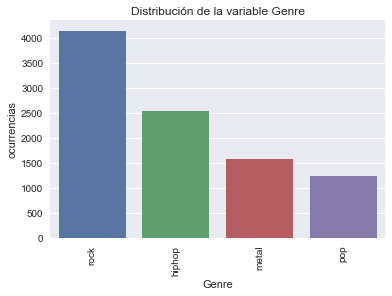

In [7]:
bar(df_lyrics,'Genre',90)

Al analizar artistas verificamos que existen 4 artistas con gran cantidad de ocurrencias //
EL rock `como siempre ha debido ser como ley universal`, muestra ser el genero con mayor influencia en nuestra data

## Ejercicio 3: Matriz de ocurrencias

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
# instanciamos un objeto
count_vectorizer=CountVectorizer(stop_words='english')
# Implementamos los pasos fit y transform
count_vectorizer_fit = count_vectorizer.fit_transform(df_lyrics.Lyrics)
# Extraemos tokens (palabras)
words = count_vectorizer.get_feature_names()
# extraemos frecuencia
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

df_words = pd.DataFrame({'Word':words, 'Frec':words_freq})

top100 = df_words.sort_values(by='Frec', ascending=False).head(100)

In [9]:
top100

,Word,Frec
24950,like,19629
12859,don,17398
23856,know,14962
18439,got,14171
23287,just,13978
25479,love,11268
48591,yeah,11071
25165,ll,10028
29851,oh,9879
7009,cause,8356


In [10]:
df_lyrics.Genre.unique()

array(['hiphop', 'metal', 'pop', 'rock'], dtype=object)

In [11]:
def fromGenre(df):
    from sklearn.feature_extraction.text import CountVectorizer
    # instanciamos un objeto
    count_vectorizer=CountVectorizer(stop_words='english')
    # Implementamos los pasos fit y transform
    for genre in df.Genre.unique():
        count_vectorizer_fit = count_vectorizer.fit_transform(df.Lyrics)
        # Extraemos tokens (palabras)
        words = count_vectorizer.get_feature_names()
        # extraemos frecuencia
        words_freq = count_vectorizer_fit.toarray().sum(axis=0)

        df_words = pd.DataFrame({'Word':words, 'Frec':words_freq})

        return df_words.sort_values(by='Frec', ascending=False).head(25)

In [12]:
fromGenre(df_lyrics[df_lyrics['Genre']=='metal'])

,Word,Frec
7883,life,1233
4088,don,1181
3284,death,1139
13844,time,1096
7977,ll,1069
7622,know,1048
7524,just,993
1458,blood,884
7914,like,869
3766,die,866


In [13]:
fromGenre(df_lyrics[df_lyrics['Genre']=='hiphop'])

,Word,Frec
18361,like,12055
13533,got,7613
9466,don,7604
17532,know,6535
17082,just,6272
28298,shit,5546
909,ain,4782
5237,cause,4737
19198,man,4481
35793,yo,4425


In [14]:
 fromGenre(df_lyrics[df_lyrics['Genre']=='pop'])

,Word,Frec
3135,don,3329
6219,like,2995
6390,love,2914
7455,oh,2737
5918,know,2677
5748,just,2610
12163,yeah,2244
655,baby,2192
4582,got,2156
6290,ll,1743


In [15]:
 fromGenre(df_lyrics[df_lyrics['Genre']=='rock'])

,Word,Frec
5282,don,5284
10362,love,5114
9697,know,4702
12077,oh,4258
20056,yeah,4157
9517,just,4103
7606,got,3872
10220,ll,3825
10113,like,3710
19093,ve,2877


La palabra transversalmente mas usada es `don`, palabras como love es utilizado de manera infima en el metal, pero muy utilizada en otros estilos

## Ejercicio 4: Entrenamiento del Modelo

In [16]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(df_lyrics['Lyrics'],df_lyrics['Genre'], test_size=.30, random_state=3324)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
pipeline_model = Pipeline([('count_vectorize', CountVectorizer()), ('modelo', MultinomialNB())])
modelo = pipeline_model.fit(X_train, y_train)
pred = modelo_1.predict(X_test)

In [37]:
new_predict = ['I got a place in the underworld', # Brody Dalle - Underworld
'As veils of ignorance, hatred retains Storm of arrows\
through karma Seeking light through samsara', # Gorguts - Forgotten Arrows
"Bye bye Don't want to be a fool for you Just another player\
in your game for two You may hate me but it ain't no lie", # N'SYNC - Bye Bye Bye
'Move bitch, get out the way Get out the way bitch,\
get out the way Move bitch, get out the way Get out the way bitch, get out the way', # Ludacris - Move B*tch
'Sexual violence doesn’t start and end with rape It\
starts in our books and behind our school gates' # IDLES - Mother
,"Take it from the girl you claimed to love You gonna get\
some bad karma I'mthe one who had to learn to build a heart\
made of armor From the girl who made you soup and tied yourshoes\
when you were hurting You are not deserving, you are not deserving" #Banks - Drowning
]
y_hat_letras = modelo.predict(new_predict)
y_hat_letras

array(['rock', 'metal', 'pop', 'hiphop', 'metal', 'rock'], dtype='<U6')

Vemos las letras predicen que los generos 
* Brody Dalle - Underworld = rock
* Gorguts - Forgotten Arrows = metal
* N'SYNC - Bye Bye Bye = pop 
* Ludacris - Move B*tch = hiphop 
* IDLES - Mother = metal
* Banks - Drowning = rock  
  
No se ven tan mal las predicciones, logro diferencia un poco sobre rock y pop que son las categorias mas dificil de diferenciar

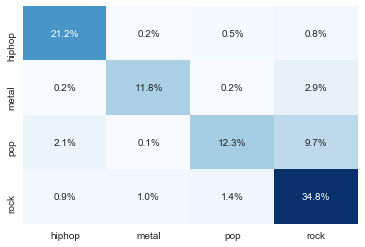

In [39]:
cnf = confusion_matrix(y_test,pred)/len(y_test)
target_label = ['hiphop','metal','pop','rock']
sns.heatmap(cnf,xticklabels=target_label,yticklabels=target_label,
            annot=True,fmt='.1%', cbar=False, cmap='Blues')

In [40]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      hiphop       0.87      0.94      0.90       979
       metal       0.90      0.78      0.84       648
         pop       0.86      0.51      0.64      1049
        rock       0.72      0.91      0.81      1646

    accuracy                           0.80      4322
   macro avg       0.84      0.79      0.80      4322
weighted avg       0.81      0.80      0.79      4322



Se observa un buen rendimiento en torno a predecir hiphop y uno bastante pobre en el pop, se da a entender esto ya que se verifico una correlacion alta junto al rock

## Ejercicio 5: Mejora del Modelo

In [45]:
df_2_lista=[]
for file in glob.glob('dump_plus_pop/*.csv'):
    df_2_lista.append(pd.read_csv(file).drop(['Unnamed: 0'],axis = 1))
df_2 = pd.concat(df_2_lista)
df_2.columns = ['Artist','Genre','Song','Lyrics']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(df_2['Lyrics'],df_2['Genre'],test_size=0.4, random_state=3324)

In [49]:
pipeline_model_2 = Pipeline([('count_vectorize', CountVectorizer()), ('modelo', MultinomialNB())])
modelo_2 = pipeline_model_2.fit(X_train, y_train)
pred2 = modelo_2.predict(X_test)

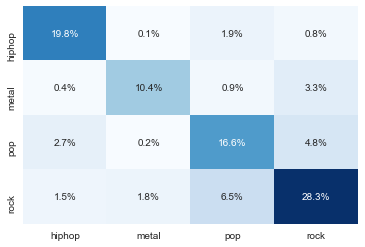

In [50]:
cnf = confusion_matrix(y_test,pred2)/len(y_test)
target_label = ['hiphop','metal','pop','rock']
sns.heatmap(cnf,xticklabels=target_label,yticklabels=target_label,
            annot=True,fmt='.1%', cbar=False, cmap='Blues')

In [51]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

      hiphop       0.81      0.87      0.84       979
       metal       0.83      0.70      0.76       648
         pop       0.64      0.68      0.66      1049
        rock       0.76      0.74      0.75      1646

    accuracy                           0.75      4322
   macro avg       0.76      0.75      0.75      4322
weighted avg       0.75      0.75      0.75      4322



Se ve una leve mejora al mejorar el sesgo en las muestras, pero no fue tan significativo como para ser una mejora radical, es mas en el hiphop se deterioro la prediccion.